# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
Rows = 1898
Col = 9
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. order_id and customer_id integers and contain respective ID's
2. restaurant_name, cuisine_type, day_of_the_week and rating stored as objects.
3. Bothe variables in 1. and 2. can be thought as categorical variables
4.cost_of_the_order is float and food_preperation_time and delivey_time are integers. All these three are numerical variables


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
df.isnull()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


In [ ]:
# Write your code here
df.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
NO, there are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# prompt: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

# Calculate the statistical summary of the 'food_preparation_time' column
food_preparation_stats = df['food_preparation_time'].describe()

# Extract the minimum, average (mean), and maximum values
min_prep_time = food_preparation_stats['min']
avg_prep_time = food_preparation_stats['mean']
max_prep_time = food_preparation_stats['max']

# Print the results
print(f"Minimum food preparation time: {min_prep_time} minutes")
print(f"Average food preparation time: {avg_prep_time} minutes")
print(f"Maximum food preparation time: {max_prep_time} minutes")


In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
For food to preprepared it takes
Minimum time of 20 min
Maximum time of 35 min
Average time or mean of 27.371970 min

### **Question 5:** How many orders are not rated?

In [ ]:
(df['rating']=='Not given').sum()

np.int64(736)

In [ ]:
# Write the code here
(df['rating']=='Not given').sum()
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:
For 736 orders rating is 'Not given', which is also the mode or the most frequently occuring value for rating. That means majority of the customers did not rate their experience or majority of the orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

Numerical variables exploration

Cost Of the Order

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

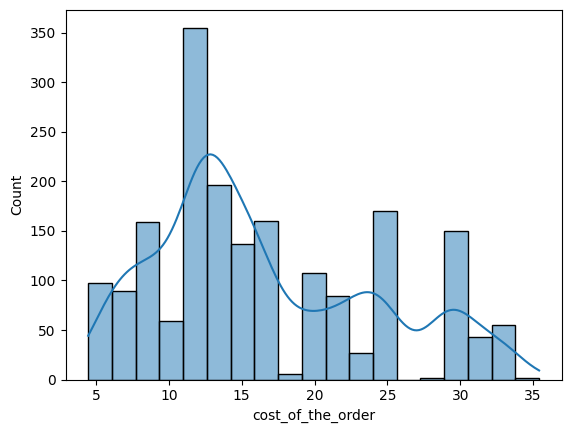

In [ ]:
# Write the code here
sns.histplot(data=df, x='cost_of_the_order', kde=True)

Observations:

1. Can say skewed to the right. Meaning majority of the orders fall to the left for the spike. Meaning majority of the orders prices are between 5 to 12

Food Preperation Time

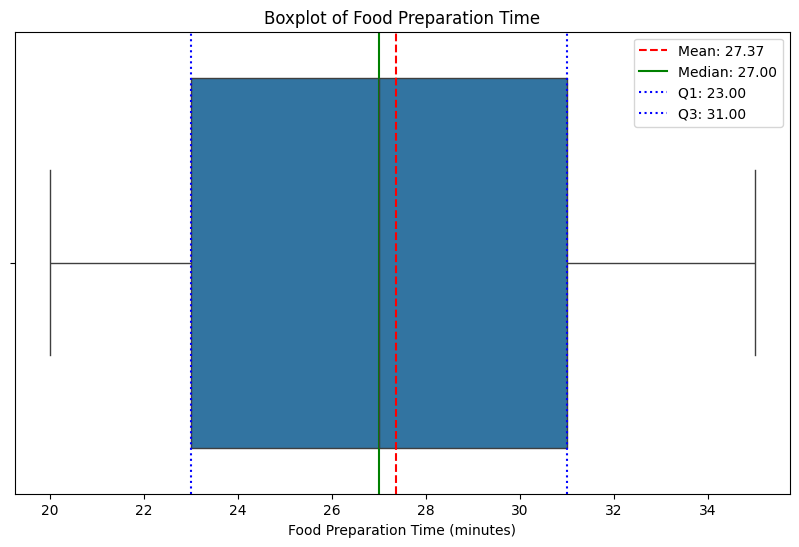

In [ ]:
# prompt: boxplot for Food_preparation)time on x axis include mean median and quartiles

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'food_preparation_time' is the column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')

# Calculate mean, median, and quartiles
mean_prep_time = df['food_preparation_time'].mean()
median_prep_time = df['food_preparation_time'].median()
q1 = df['food_preparation_time'].quantile(0.25)
q3 = df['food_preparation_time'].quantile(0.75)

# Add mean, median, and quartiles to the plot
plt.axvline(mean_prep_time, color='red', linestyle='--', label=f'Mean: {mean_prep_time:.2f}')
plt.axvline(median_prep_time, color='green', linestyle='-', label=f'Median: {median_prep_time:.2f}')
plt.axvline(q1, color='blue', linestyle=':', label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='blue', linestyle=':', label=f'Q3: {q3:.2f}')

plt.legend()
plt.show()


<Axes: xlabel='food_preparation_time'>

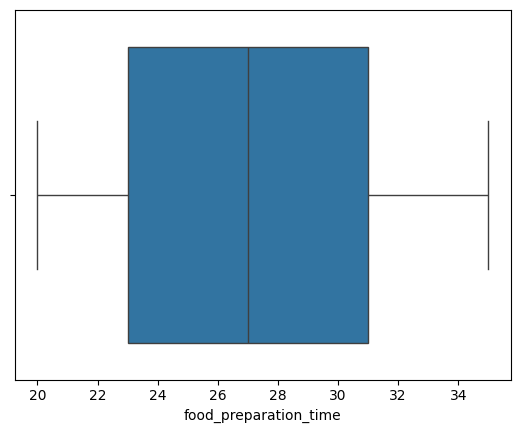

In [ ]:
#Analysis for food_preparation_time
#sns.histplot(data=df, x='food_preparation_time', kde=True)
sns.boxplot(data=df, x='food_preparation_time')



Observations:
1. Median is slightly toward the right or closer to the Q3
2. 25% of the orders takes between 20-23 min to be prepared
3. 25% of the orders takes between 31-35 min to be prepared
4. 50% of the orders take 23 - 31 to be prepared


Delivery Time

<Axes: xlabel='delivery_time'>

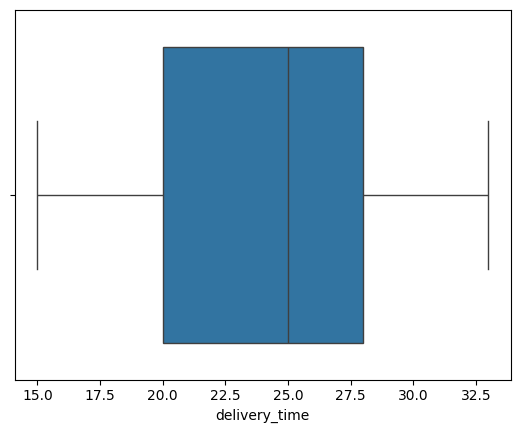

In [ ]:
sns.boxplot(data=df, x='delivery_time')

Observations:
1. Skewed to the left, that means majority of the orders take more than 25 min to be preparedd
2. No outliers


Day Of The Week

<Axes: xlabel='day_of_the_week', ylabel='count'>

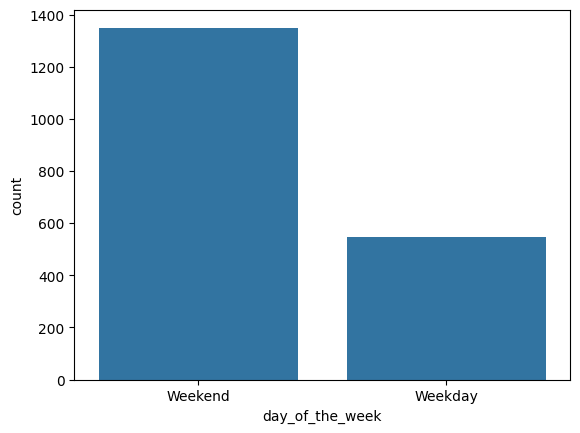

In [ ]:
sns.countplot(data=df, x='day_of_the_week')

Observations:
1. More orders are placed during Weekends

Cuisine Type

<Axes: xlabel='cuisine_type', ylabel='count'>

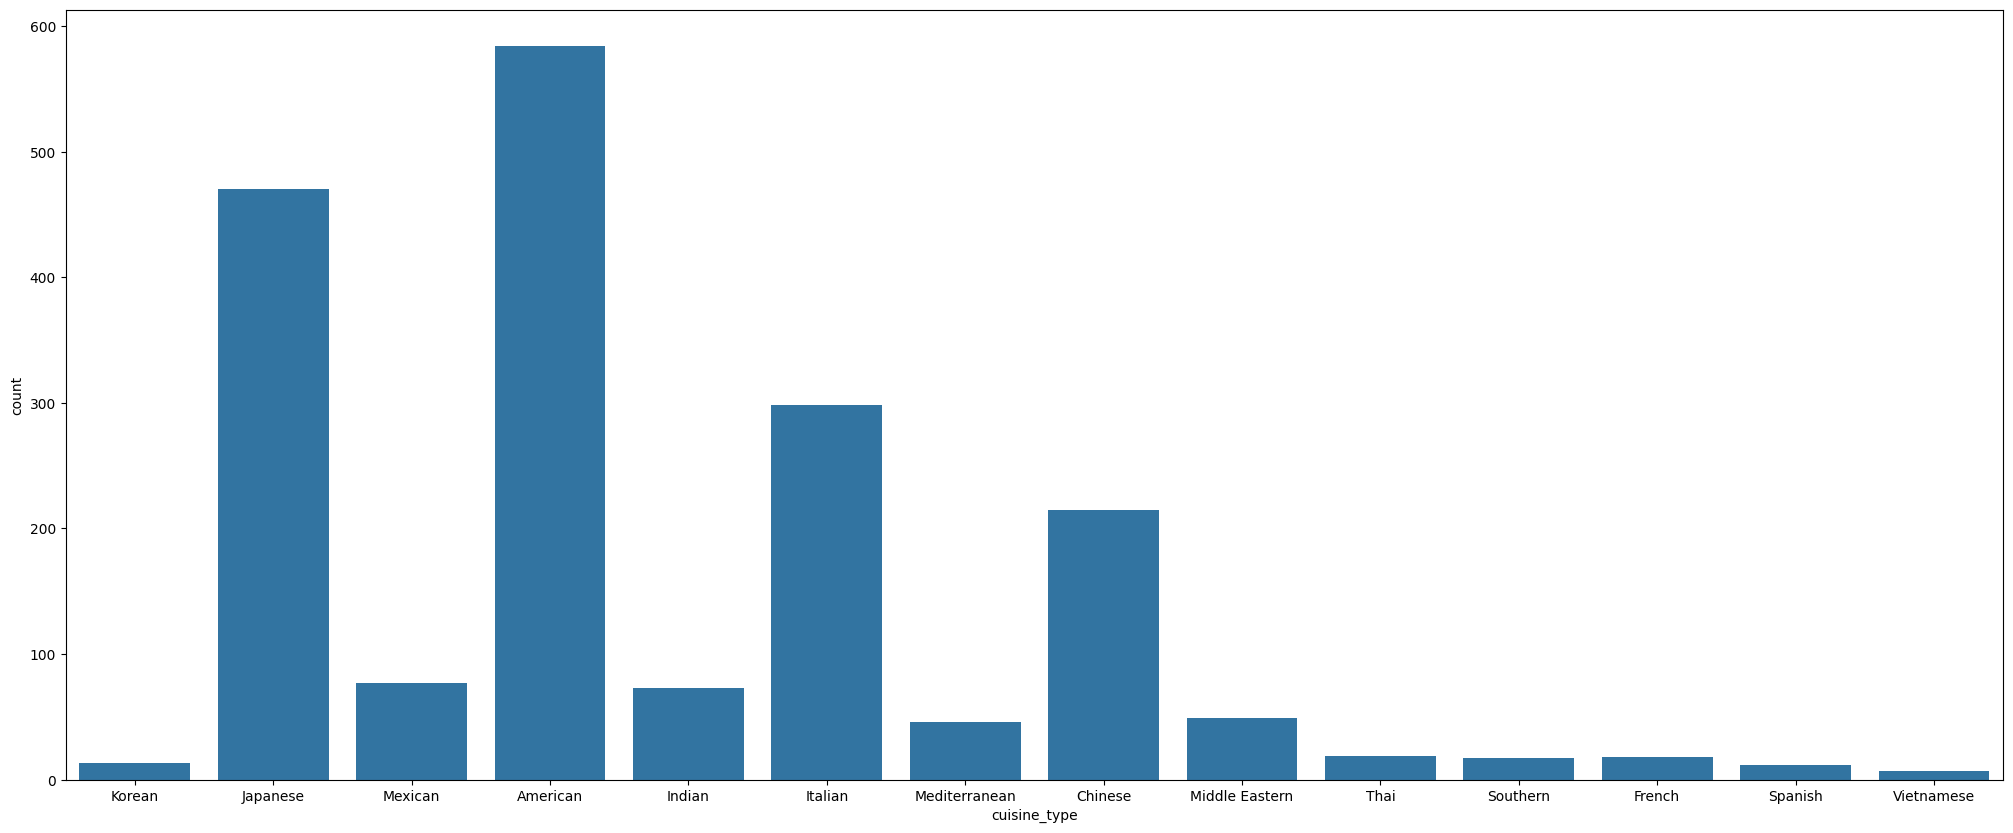

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data=df, x='cuisine_type')

Observations:
American Cuisine has the highest count of orders followed by Japanese and Italian

Rating

<Axes: xlabel='rating', ylabel='count'>

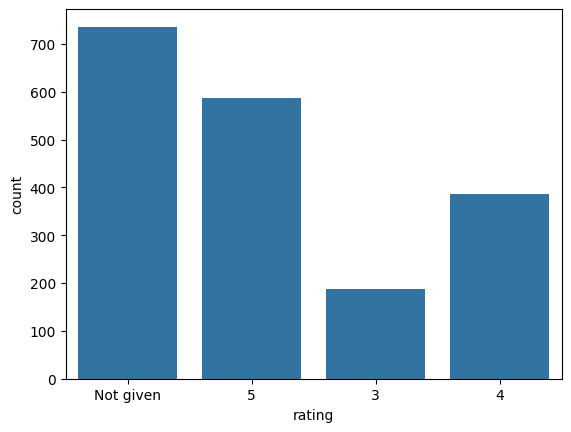

In [ ]:
sns.countplot(data=df, x='rating')

Observations:
Majority of the orders are not rated

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
df['restaurant_name'].value_counts()


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations:
Below are the top 5 restraunts with most orders. Shake Shack has the highest orders.


1.   Shake Shack = 219
2.   The Meatball Shop = 132
3.   Blue Ribbon Sushi = 119
4. Blue Ribbon Fried Chicken = 96
5. Parm = 68








### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Get the dataset with orders only on weekend
dfweekend = df[df['day_of_the_week']=='Weekend']
dfweekend['cuisine_type'].value_counts()


cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

<Axes: xlabel='cuisine_type', ylabel='count'>

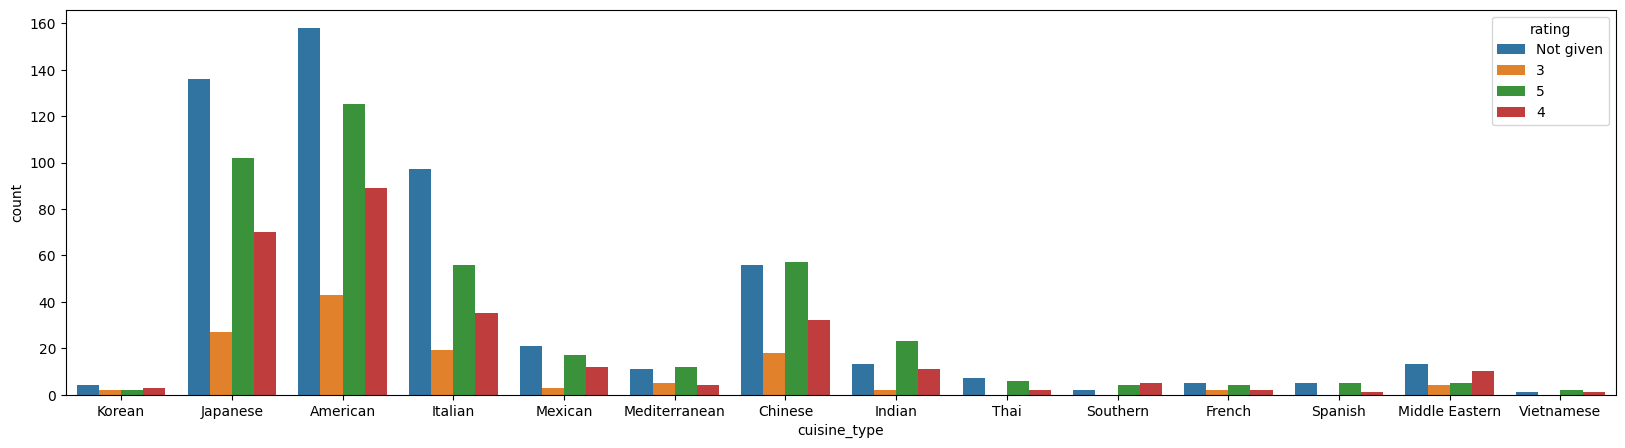

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=dfweekend, x='cuisine_type', hue='rating')

#### Observations:
The answer is American.
Not only does American cusuine has the highest number orders 415, but also has highest ratings in 5,4 and 3 catogories compared to other cusuine types

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:

df.loc[df['cost_of_the_order'] > 20].shape


(555, 9)

In [ ]:
percentage = (555/1898)*100
print(percentage)

29.24130663856691


#### Observations:
29.24% of orders cost more than $20


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is
24.161749209694417

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Observations:
Below is the table with the required customerIDs and number of orders they have placed.

1.   52832      13
2.   47440      10
3.   83287      9




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

Correlation

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')
# returns the first 5 rows

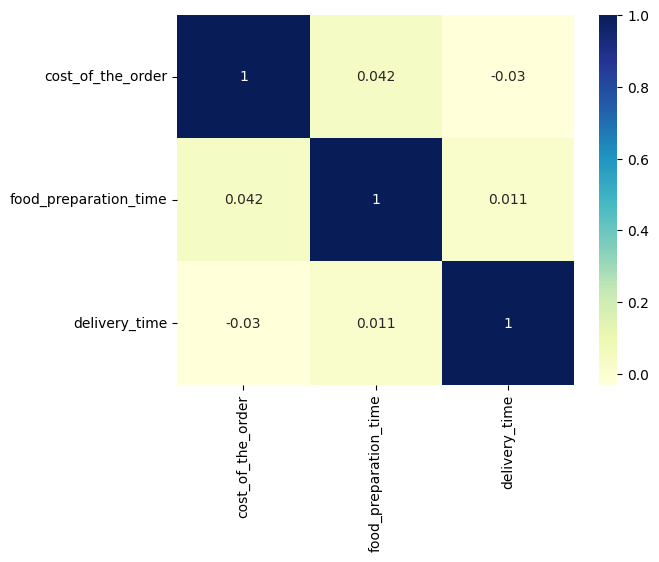

In [ ]:
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cmap='YlGnBu');

Observations:


1.food_preperation_time and cost_of_the_order are slightly positively correlated
2.Delevery_time and food_preperation_time are also slightly positively correlated
3.Delevery_time and cost_of_the_order are negetvely related





Relationship between Day of the Week and Deliver Time

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

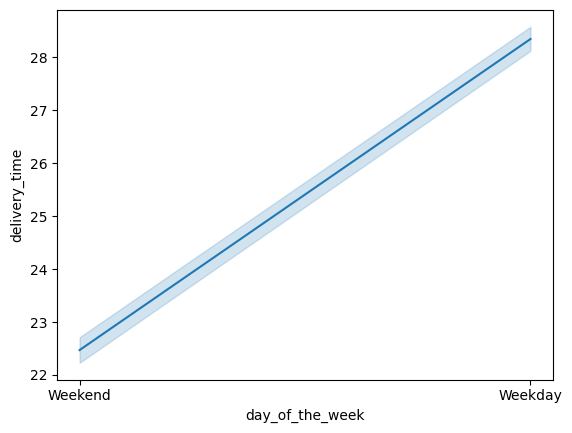

In [ ]:
sns.lineplot(data=df, x='day_of_the_week', y='delivery_time')



Observations:
It takes more time to be delivered on weekdays than weekends. Or Weekends has less delivery time.

Relationship between Day of the week and Cost of the order

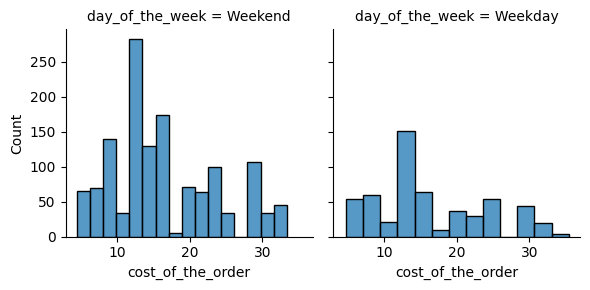

In [ ]:
g = sns.FacetGrid(df, col="day_of_the_week")
g.map(sns.histplot, "cost_of_the_order");

Observations:
There are more orderes on the weekends compared to weekdays and we do see more orders with higher price on the weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')
# returns the first 5 rows

In [ ]:
#First get the df of orders which are rated
dfnr = df[df['rating']!='Not given']

In [ ]:
#Convert the rating datatype to numerical to calculate the mean of each qualified restraunt
dfnr['rating'] = pd.to_numeric(dfnr['rating'])

In [ ]:
#value counts on the remaining orders for each restraunt
#Here because I removed all non rated, I am looking at the remaing orders which must have ratings
dfnr['restaurant_name'].value_counts()

restaurant_name
Shake Shack                    133
The Meatball Shop               84
Blue Ribbon Sushi               73
Blue Ribbon Fried Chicken       64
RedFarm Broadway                41
                              ... 
Philippe Chow                    1
Dirty Bird To Go (archived)      1
The MasalaWala                   1
Kambi Ramen House                1
'wichcraft                       1
Name: count, Length: 156, dtype: int64

In [ ]:
#Restraunts with count greater than 50
dfnr['restaurant_name'].value_counts() > 50

restaurant_name
Shake Shack                     True
The Meatball Shop               True
Blue Ribbon Sushi               True
Blue Ribbon Fried Chicken       True
RedFarm Broadway               False
                               ...  
Philippe Chow                  False
Dirty Bird To Go (archived)    False
The MasalaWala                 False
Kambi Ramen House              False
'wichcraft                     False
Name: count, Length: 156, dtype: bool

In [ ]:
#Print average of all the selected restraunts
print("Shake Shack")
print ( dfnr.loc[dfnr['restaurant_name']=='Shake Shack']['rating'].mean())
print("The Meatball Shop")
print (dfnr.loc[dfnr['restaurant_name']=='The Meatball Shop']['rating'].mean())
print("Blue Ribbon Sushi")
print (dfnr.loc[dfnr['restaurant_name']=='Blue Ribbon Sushi']['rating'].mean())
print("Blue Ribbon Fried Chicken")
print (dfnr.loc[dfnr['restaurant_name']=='Blue Ribbon Fried Chicken']['rating'].mean())



Shake Shack
4.2781954887218046
The Meatball Shop
4.511904761904762
Blue Ribbon Sushi
4.219178082191781
Blue Ribbon Fried Chicken
4.328125


#### Observations:
All the below listed restraunts qualify for the promotion, as they all have rating counts >50 and average rating is >4


1.   Shake Shack 4.2781954887218046
2.   The Meatball Shop 4.511904761904762
3.   Blue Ribbon Sushi  4.219178082191781
4.  Blue Ribbon Fried Chicken 4.328125





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')
# returns the first 5 rows

In [ ]:
# Write the code here
def profit25(s):
    return s*25/100 # get x percentage of s

def profit15(s):
    return s*15/100 # get x percentage of s

In [ ]:
dfrev = df
#create a new column charge_to_restraunt to capture the 25% and 15% cahrge on orders >20 and orders >5 and <20 respectively
dfrev.loc[dfrev['cost_of_the_order'] > 20, 'charge_to_restraunt'] = dfrev['cost_of_the_order'].apply(profit25)
dfrev.loc[((dfrev['cost_of_the_order'] > 5) & (dfrev['cost_of_the_order']<= 20)), 'charge_to_restraunt'] = dfrev['cost_of_the_order'].apply(profit15)
dfrev.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,charge_to_restraunt
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
#Add up the newly created column values to get the net revenue
TotalRevenue = dfrev['charge_to_restraunt'].sum()
print(TotalRevenue)

6166.303


#### Observations:
The TotalRevenue can be 6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Write the code here
dftemp = df
#create a new column total_time to capture the total time
dftemp['total_time'] = dftemp[['delivery_time', 'food_preparation_time']].sum(axis=1)
dftemp.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [ ]:
#to get to see how many rows has total time >60
dftemp.loc[dftemp['total_time']>60].shape

(200, 10)

In [ ]:
percentage = ( 200/ 1898) * 100
print(percentage)

10.537407797681771


#### Observations:
10.54% of orders take more than 60 min in total time

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')
# returns the first 5 rows
#df.head()

In [ ]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery times on weekdays is 28.35 while for weekends its 22.47. This shows food gets delivered faster during weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

Overall Americal cuisine seems to be popular, both in number of orders and the rating adding more of these restruants to the restraunt base might increase the number of custtomer base.

<Axes: xlabel='cuisine_type', ylabel='count'>

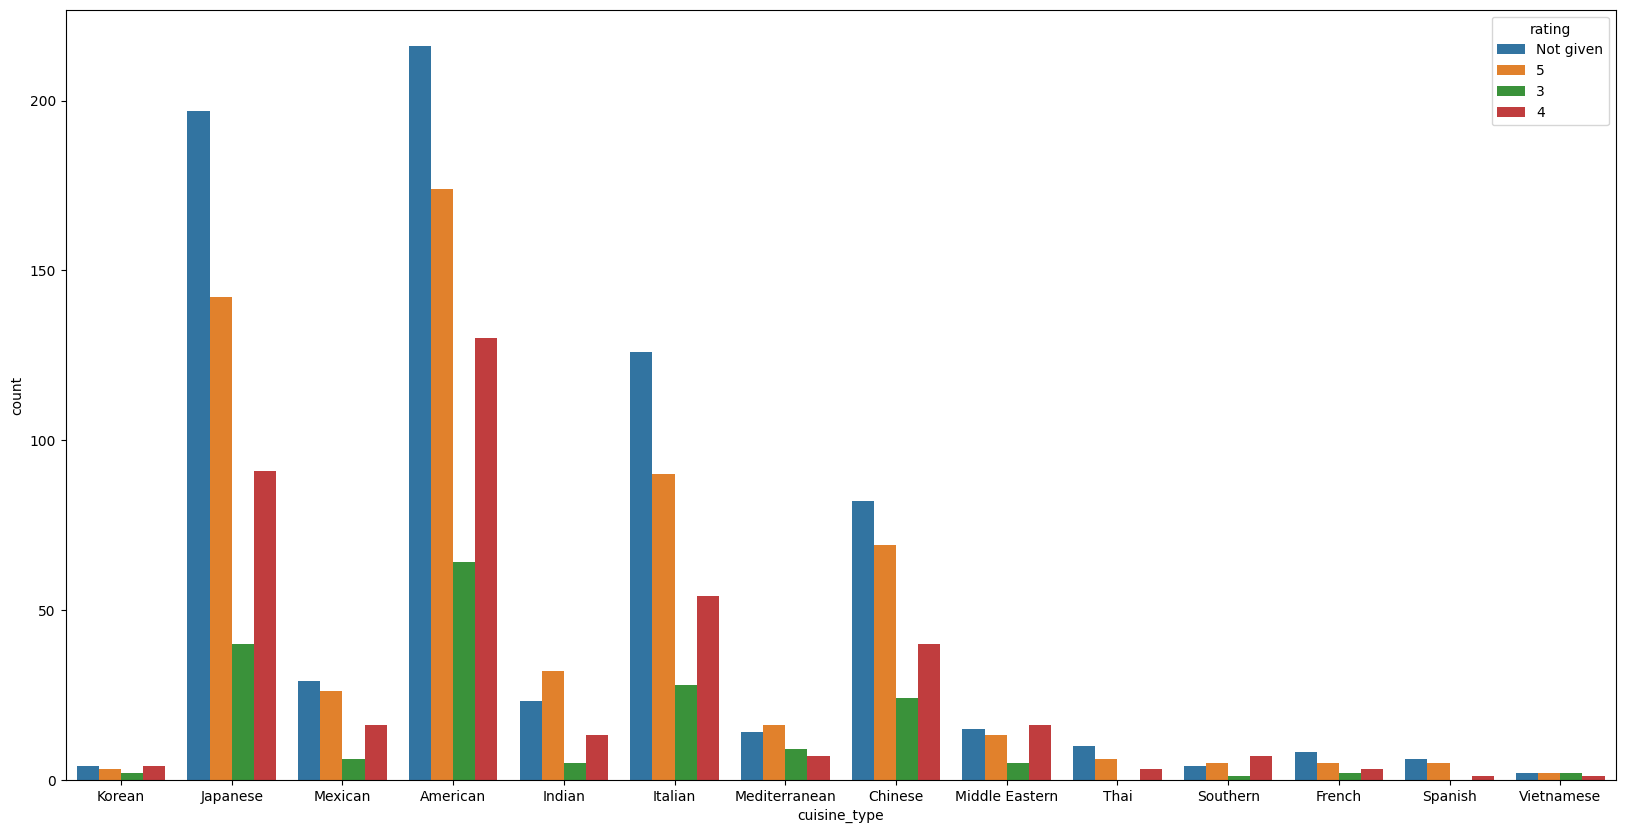

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='cuisine_type', hue='rating')

### Conclusions:
Overall Americal cuisine seems to be popular, both in number of orders and the rating

### Recommendations:

Adding more of American cuisine restruants to the restraunt base might increase the number of customer base and increase the orders

---